In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")


In [3]:
fffff=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [4]:
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [5]:
ty=test["LotFrontage"]

In [6]:
ty=ty.to_dict()

In [7]:
for i,j in ty.items():
    test["LotFrontage"].iloc[i]=j

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Quite a huge dataset with 81 features

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Lets see the feature contaning null values

In [10]:
a=[]
def missvalue(t):
    for i in t.columns:
        if(t[i].isnull().sum()>0):
              a.append(i)
            

In [11]:
missvalue(train)
a

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
a=[]
missvalue(test)
a

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

test dataset has more null value than train set(this observeation will be help us in future while dealing with missing value)

# Handling missing values

In [13]:
a=[]
missvalue(train)


Lets do it for train dataset first
1-separate categorical and numerical missing feature

In [14]:
num=[]
cat=[]
def separate(train,p):
    for i in p:
        if(train[i].dtypes=='O'):
            cat.append(i)
        else:
            num.append(i)
    

In [15]:
separate(train,a)

In [16]:
cat

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [17]:
num

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Lets deal with numerical attribute first
,Here LotFrontage and MasVnrArea are continous Variable and GarageYrBlt is descrete Variable
.Lets check that if these are correlated with some other variable

In [18]:
num2=[]
num1=[]
def cor(k):
    corr=train.corr()
    for l in k:
        m=0
        t=corr[l].sort_values(ascending=False)
        t=t.to_dict()
        for i,j in t.items():
            if(j>0.5):
                print(i,j)
                m=m+1
        if(m>1):
            num1.append(l)
        else:
            num2.append(l)
                
           
        print("*"*40)

In [19]:
cor(num)

LotFrontage 1.0
****************************************
MasVnrArea 1.0
****************************************
GarageYrBlt 1.0
YearBuilt 0.8256674841743434
YearRemodAdd 0.6422767797035414
GarageCars 0.5889200070047019
GarageArea 0.5645670607230588
OverallQual 0.5477658448351637
****************************************


In [20]:
num1

['GarageYrBlt']

In [21]:
num2

['LotFrontage', 'MasVnrArea']

LotFrontage and MasVnrArea are not so correlated but GarageYrBlt is highly correlated on other features

Lets Draw Boxplot of LotFrontage and MasVnrArea to understand whether mean or median to be used to fill null values

In [22]:
def fig(k,c):
     for i in k:
        sns.boxplot(i,data=train)
        plt.show()
        



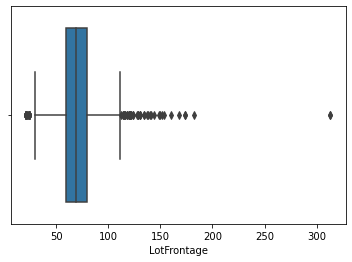

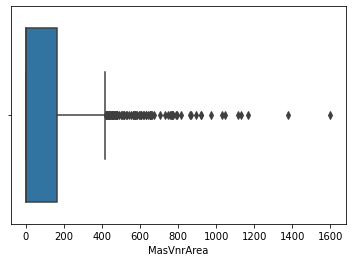

In [23]:
fig(num2,train)

There r too many outliers so we should stick with median

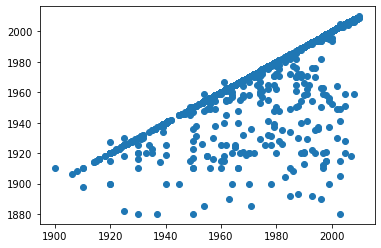

In [24]:
plt.scatter(train['GarageYrBlt'],train['YearBuilt'])

We clearly see a line btw these two variable we will use linear regression model to predict those null values

Dealing with discrete numerical attribute(using linear regression)

In [25]:
def discrete(a,b,c):
    t=b[a].isnull()
    t=t.to_dict()
    k=[]
    for i,j in t.items():
        if j==True:
            k.append(i)
    p=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
    m=pd.DataFrame(p[c].loc[k])
    p.drop(k,inplace=True)
    u=p[c].mode()
    p.fillna(u,inplace=True)
    t1=p[c].values
    t2=p[a].values
    t1=t1.reshape(-1,1)
    from sklearn.linear_model import LinearRegression
    lin_reg=LinearRegression()
    lin_reg.fit(t1,t2)
    l=m.values
    y=lin_reg.predict(l)
    y = [round(x) for x in y]
    q=0
    for i,j in t.items():
        if j==True:
               b[a].iloc[i]=y[q]
               q=q+1  

In [26]:
discrete("GarageYrBlt",train,"YearBuilt")

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [27]:
train["GarageYrBlt"].isnull().sum()

0

In [28]:
train['LotFrontage'].fillna(69,inplace=True)
train['LotFrontage'].isnull().sum()

0

In [29]:
train['MasVnrArea'].mean()

103.68526170798899

In [30]:
train['MasVnrArea'].fillna(0,inplace=True)

Dealing with missing categorical attributes

In [31]:
cat

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

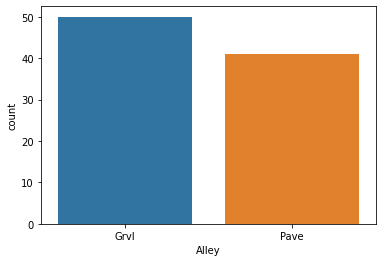

1369


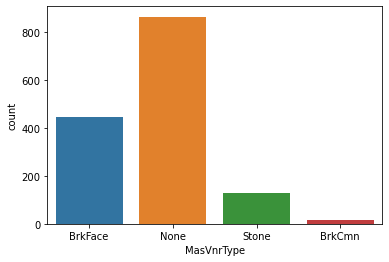

8


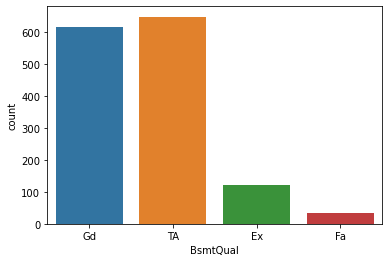

37


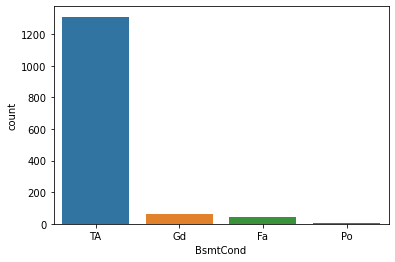

37


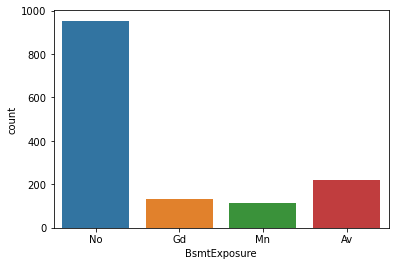

38


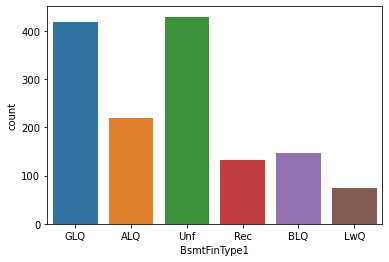

37


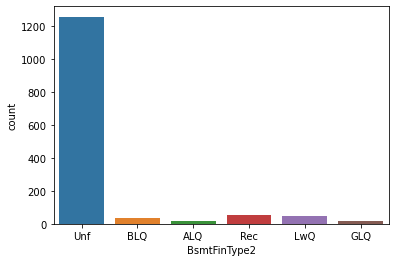

38


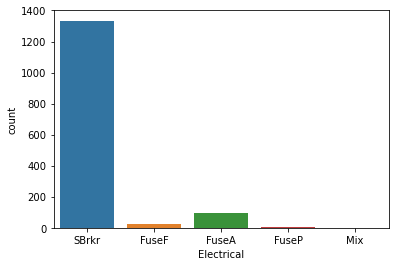

1


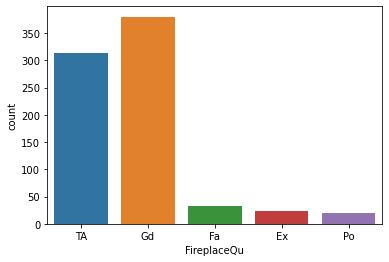

690


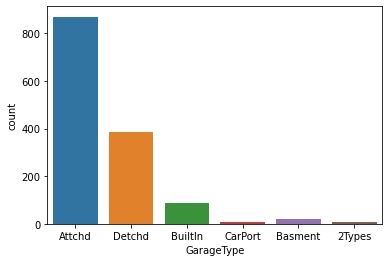

81


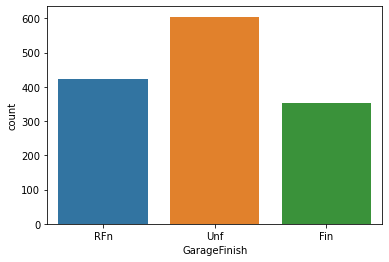

81


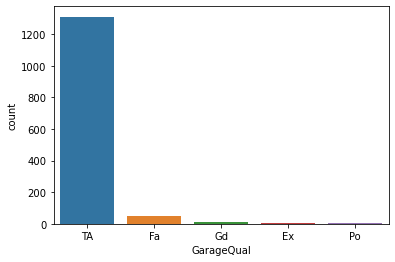

81


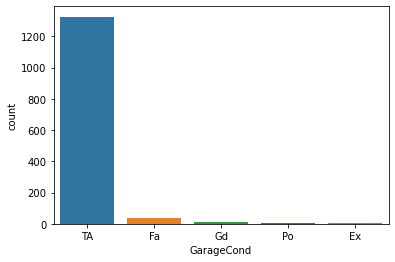

81


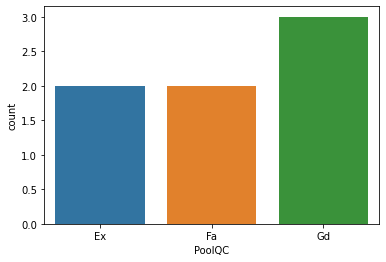

1453


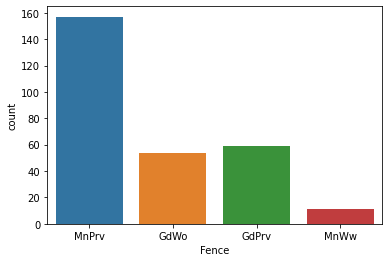

1179


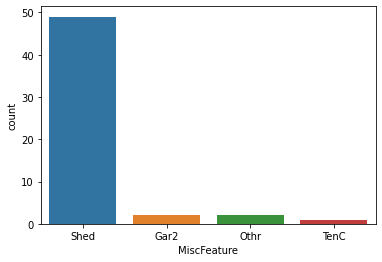

1406


In [32]:
for i in cat:
    sns.countplot(i,data=train)
    plt.show()
    t=train[i].isnull().sum()
    print(t)

Its better to use ML models to predict missing value(we r gonna use knearest neighbours)

In [33]:
train.drop(['MiscFeature','Fence','PoolQC','Alley'],axis=1,inplace=True)

In [34]:
k=['MiscFeature','Fence','PoolQC','Alley']

cat = [element for element in cat if element not in k]

In [35]:
cat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [36]:
len(train.columns)

77

In [37]:
def categorical(ca,tttt):
    for al in ca:
        t=tttt[al].isnull()
        t=t.to_dict()  
        k=[]
        for i,j in t.items():
            if j==True:
                 k.append(i)
        p=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
        p.drop(['MiscFeature','Fence','PoolQC','Alley'],axis=1,inplace=True)
        z=pd.DataFrame(p.iloc[k])
        z.drop([al],axis=1,inplace=True)
        p.drop(k,inplace=True)
        q=p[al].value_counts()
        q=q.to_dict()
        m=1
        for i,j in q.items():
            q[i]=m
            m=m+1
        p.replace({al:q},inplace=True)
        t1=p[al].values
        p.drop([al],axis=1,inplace=True)
        p.fillna(0,inplace=True)
        def split(a):
            num=a.select_dtypes(include=[np.number]) 
            cat=a.select_dtypes(exclude=[np.number])
            cat=pd.get_dummies(cat)
            return num,cat
         
        x,y=split(p)
        scaler = preprocessing.StandardScaler()
        def scaling(x,y):
             features_scaled=scaler.fit_transform(x.values)
             q=y.values
             vk=np.concatenate((q,features_scaled),axis=1)
             return vk
        features=scaling(x,y)
        (x_train,x_test,y_train,y_test) = train_test_split(features,t1, train_size=0.75, random_state=42)
        rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=100, random_state=42)
        rnd_clf.fit(x_train,y_train)
        z.fillna(0,inplace=True)
        r,s=split(z)
        for w in y.columns:
            for o in s.columns:
                if(w==o):
                    c=1
                    break
                else:
                    c=2
            if(c==2):
                s[w]=0
        for o in s.columns:
                for w in y.columns:
                    if(o==w):
                        c=1
                        break
                    else:
                        c=2
                if(c==2):
                    s.drop(o,axis=1,inplace=True)
     
        for oe in r.columns:
            for we in x.columns:
                if(we==oe):
                    c=1
                    break
                else:
                    c=2
            if(c==2):
                r.drop(oe,axis=1,inplace=True)
        for we in x.columns:
            for oe in r.columns:
                if(we==oe):
                    c=1
                    break
                else:
                    c=2
            if(c==2):
                r[we]=0
            
                    
       
        features=scaling(r,s)
        y_pred=rnd_clf.predict(features)
        h=[]
        for l in range(len(y_pred)):
                u=[i for i,j in q.items() if j==y_pred[l]]
                for tyyy in u:
                    h.append(tyyy)
        x=0
        for i,j in t.items():
                if j==True:
                       tttt[al].iloc[i]=h[x]
                       x=x+1  
        

In [38]:
categorical(cat,train)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

In [39]:
len(train.columns)

77

In [40]:
train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [42]:
a=[]
missvalue(test)
num=[]
cat=[]
separate(test,a)
num2=[]
num1=[]
cor(num)


LotFrontage 1.0
****************************************
MasVnrArea 1.0
****************************************
BsmtFinSF1 1.0
BsmtFullBath 0.6492117535742737
TotalBsmtSF 0.5223960519923907
****************************************
BsmtFinSF2 1.0
****************************************
BsmtUnfSF 1.0
****************************************
TotalBsmtSF 1.0
1stFlrSF 0.8195299750050355
SalePrice 0.6135805515591944
OverallQual 0.5378084986123927
BsmtFinSF1 0.5223960519923907
****************************************
BsmtFullBath 1.0
BsmtFinSF1 0.6492117535742737
****************************************
BsmtHalfBath 1.0
****************************************
GarageYrBlt 1.0
YearBuilt 0.839921822645958
YearRemodAdd 0.6201816577663517
GarageCars 0.5754223568749822
GarageArea 0.562445403098254
OverallQual 0.5494242757237608
SalePrice 0.5018468404018182
****************************************
GarageCars 1.0
GarageArea 0.8824754142814603
SalePrice 0.640409197258349
OverallQual 0.6006707165907

In [43]:
discrete('BsmtFinSF1',test,"BsmtFullBath")


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [44]:
discrete('TotalBsmtSF',test,"1stFlrSF")
discrete('BsmtFullBath',test,"BsmtFinSF1")

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [45]:
test["YearBuilt"].mode()

0    2005
dtype: int64

In [46]:

discrete('GarageCars',test,"GarageArea")

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [47]:
discrete('GarageArea',test,"GarageCars")

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [48]:
test["YearBuilt"].isnull().sum()

0

In [49]:
test["GarageYrBlt"].isnull().sum()

78

In [50]:
train["GarageYrBlt"].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1983., 1977., 1942., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1975., 1974., 2009., 1938., 1950., 1961.,
       1921., 1900., 1969., 1979., 1951., 1941., 1952., 1949., 1936.,
       1971., 1923., 1984., 1926., 1955., 1986., 1988., 1916., 1932.,
       1972., 1918., 1980., 1924., 1996., 1940., 1994., 1910., 1978.,
       1982., 1992., 1925., 1943., 2010., 1927., 1947., 1937., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1944., 1911., 1929.,
       1933.])

In [51]:
train["YearBuilt"].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

In [52]:
test["GarageYrBlt"].fillna(2005,inplace=True)

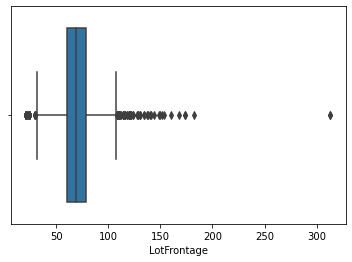

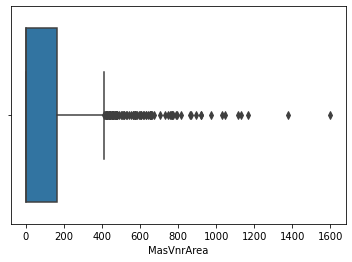

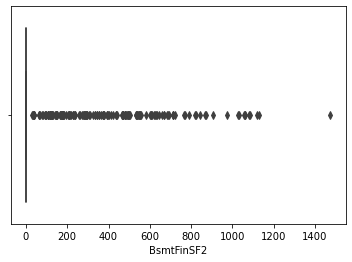

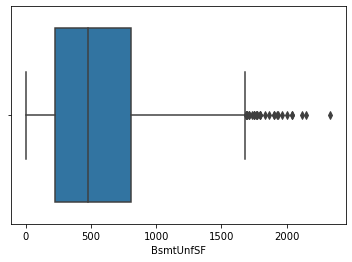

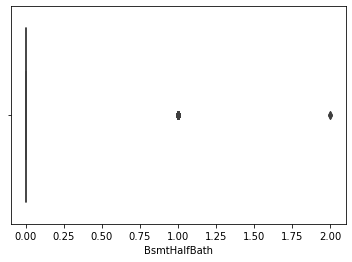

In [53]:
fig(num2,train)

In [54]:
test["LotFrontage"]

0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64

In [55]:
test["LotFrontage"].fillna(test["LotFrontage"].median(),inplace=True)

In [56]:
test["MasVnrArea"].fillna(test["MasVnrArea"].median(),inplace=True)

In [57]:
test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].mode(),inplace=True)
test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].median(),inplace=True)


In [58]:
test["BsmtHalfBath"].fillna(test["BsmtHalfBath"].mode(),inplace=True)

In [59]:
cat

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

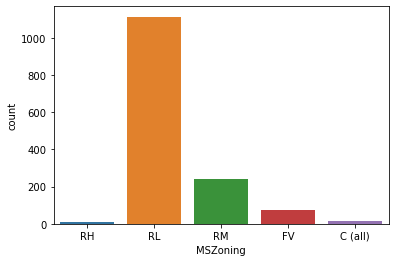

4


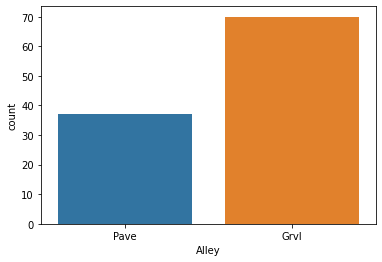

1352


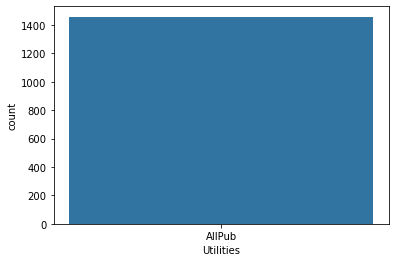

2


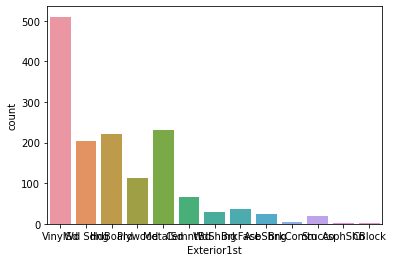

1


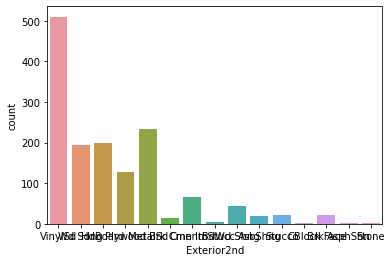

1


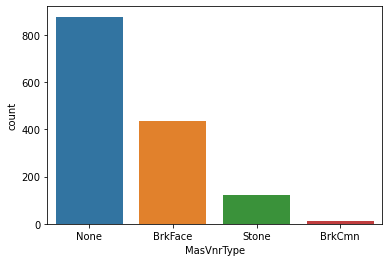

16


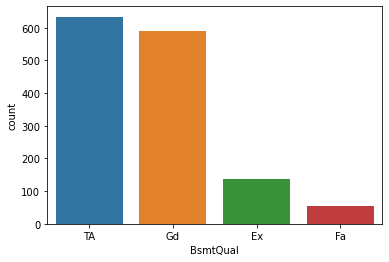

44


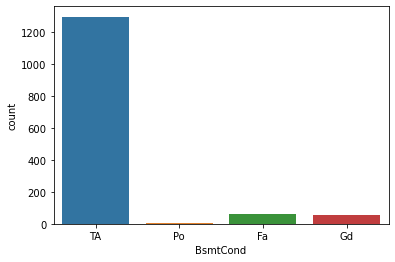

45


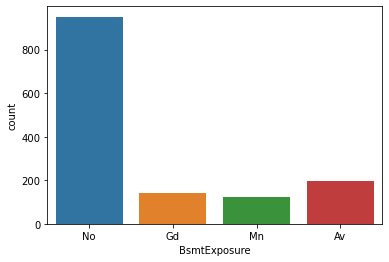

44


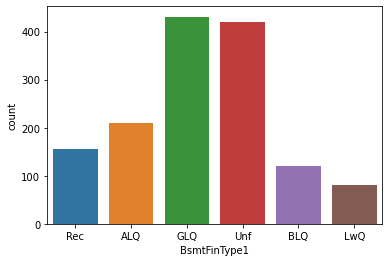

42


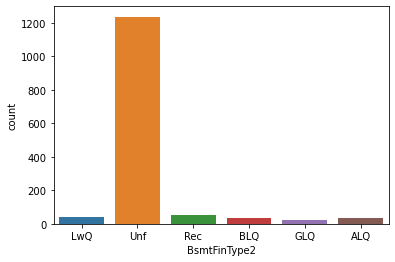

42


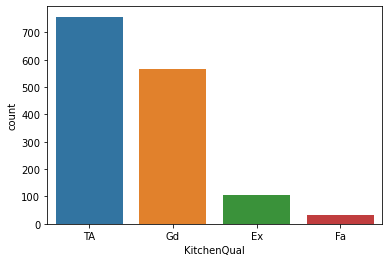

1


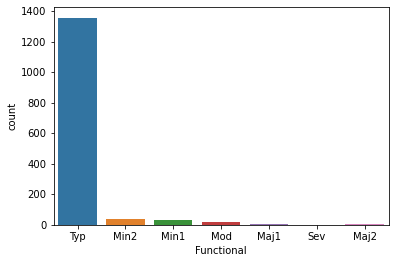

2


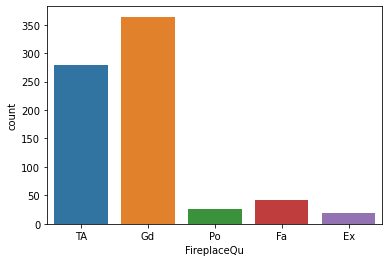

730


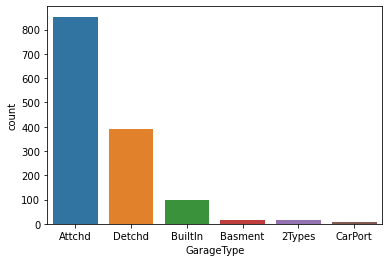

76


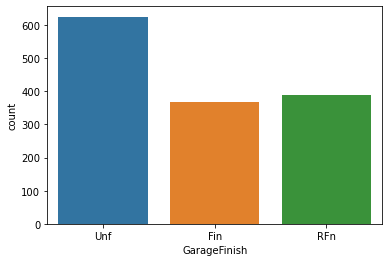

78


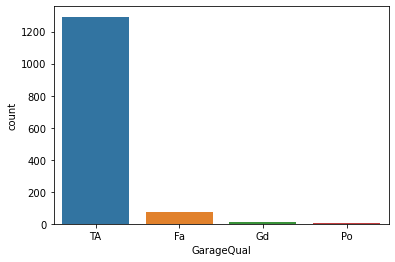

78


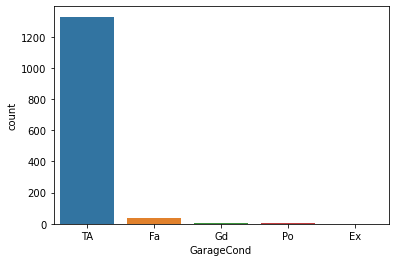

78


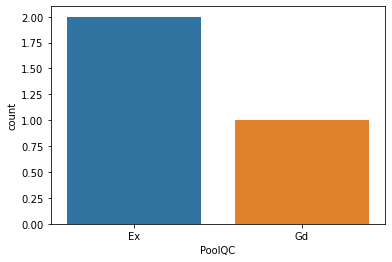

1456


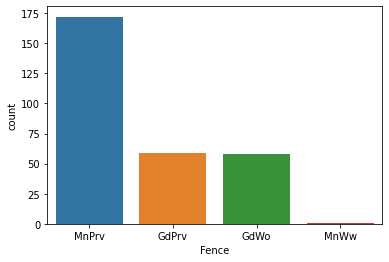

1169


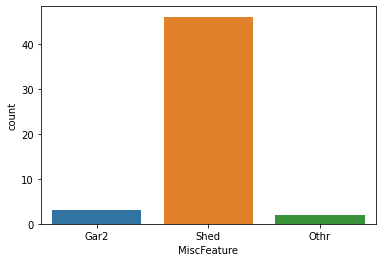

1408


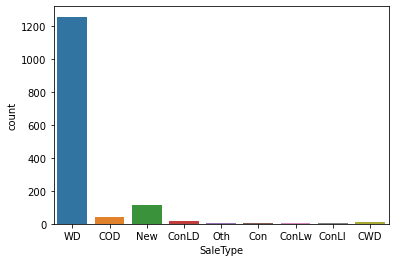

1


In [60]:
for i in cat:
    sns.countplot(i,data=test)
    plt.show()
    t=test[i].isnull().sum()
    print(t)

In [61]:
test.drop(['MiscFeature','Fence','PoolQC','Alley'],axis=1,inplace=True)


In [62]:
k=['MiscFeature','Fence','PoolQC','Alley']

cat = [element for element in cat if element not in k]

In [63]:
cat

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [64]:
len(test.columns)

76

In [65]:
test['MasVnrType'].value_counts()


None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [66]:
def categori(ca,tttt):
    for al in ca:
        t=tttt[al].isnull()
        t=t.to_dict()  
        k=[]
        for i,j in t.items():
            if j==True:
                 k.append(i)
        p=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
        p.drop(['MiscFeature','Fence','PoolQC','Alley'],axis=1,inplace=True)
        z=pd.DataFrame(p.iloc[k])
        z.drop([al],axis=1,inplace=True)
        p.drop(k,inplace=True)
        q=p[al].value_counts()
        q=q.to_dict()
        m=1
        for i,j in q.items():
            q[i]=m
            m=m+1
        p.replace({al:q},inplace=True)
        t1=p[al].values
        p.drop([al],axis=1,inplace=True)
        p.fillna(0,inplace=True)
        def split(a):
            num=a.select_dtypes(include=[np.number]) 
            cat=a.select_dtypes(exclude=[np.number])
            cat=pd.get_dummies(cat)
            return num,cat
         
        x,y=split(p)
        scaler = preprocessing.StandardScaler()
        def scaling(x,y):
             features_scaled=scaler.fit_transform(x.values)
             q=y.values
             vk=np.concatenate((q,features_scaled),axis=1)
             return vk
        features=scaling(x,y)
        (x_train,x_test,y_train,y_test) = train_test_split(features,t1, train_size=0.75, random_state=42)
        rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=100, random_state=42)
        rnd_clf.fit(x_train,y_train)
        z.fillna(0,inplace=True)
        r,s=split(z)
        for w in y.columns:
            for o in s.columns:
                if(w==o):
                    c=1
                    break
                else:
                    c=2
            if(c==2):
                s[w]=0
        for o in s.columns:
                for w in y.columns:
                    if(o==w):
                        c=1
                        break
                    else:
                        c=2
                if(c==2):
                    s.drop(o,axis=1,inplace=True)
     
        for oe in r.columns:
            for we in x.columns:
                if(we==oe):
                    c=1
                    break
                else:
                    c=2
            if(c==2):
                r.drop(oe,axis=1,inplace=True)
        for we in x.columns:
            for oe in r.columns:
                if(we==oe):
                    c=1
                    break
                else:
                    c=2
            if(c==2):
                r[we]=0
            
                    
       
        features=scaling(r,s)
        y_pred=rnd_clf.predict(features)
        h=[]
        for l in range(len(y_pred)):
                u=[i for i,j in q.items() if j==y_pred[l]]  
                for tyyy in u:
                    h.append(tyyy)
        x=0
        for i,j in t.items():
                if j==True:
                       tttt[al].iloc[i]=h[x]
                       x=x+1  
        

In [67]:
categori(cat,test)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

In [68]:
len(test.columns)

76

# Continuos Data Visulization And Transformation


In [69]:
num=[]
cat=[]
def sep(tv):
    for i in tv.columns:
        if(tv[i].dtypes=='O'):
            cat.append(i)
        else:
            num.append(i)

In [70]:
sep(train)

Lets Separate Continous and discrete numerical variables

In [71]:
cont=[]
disc=[]
def numsep():
    for i in num:
        t=train[i].value_counts()
        qw=len(t)
        if qw>20:
            cont.append(i)
        else:
            disc.append(i)
        

In [72]:

numsep()

In [73]:
cont

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [74]:
disc

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

Lets Plot hist graph of continous curve

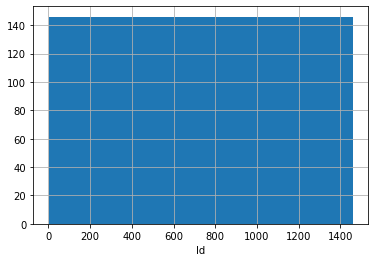

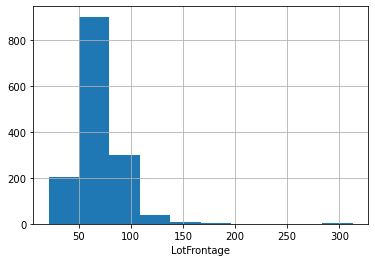

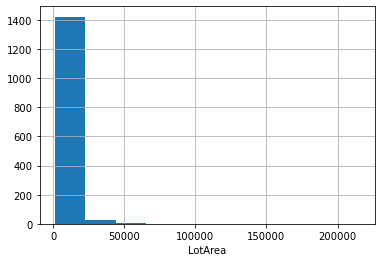

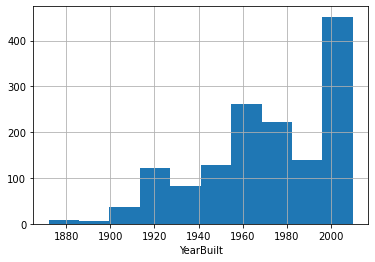

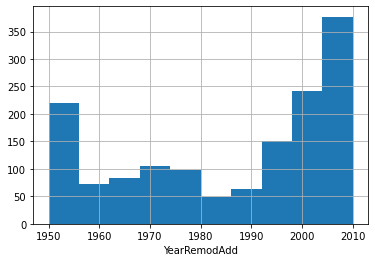

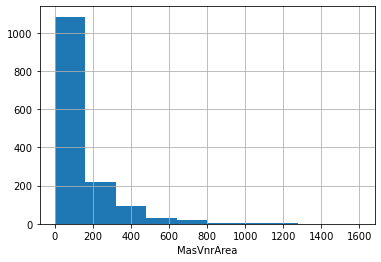

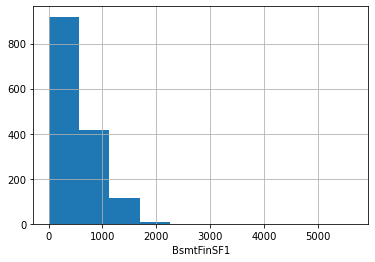

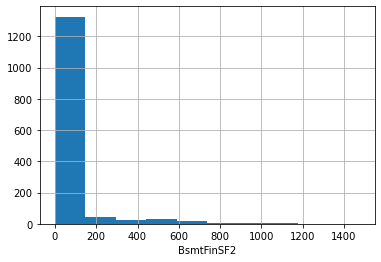

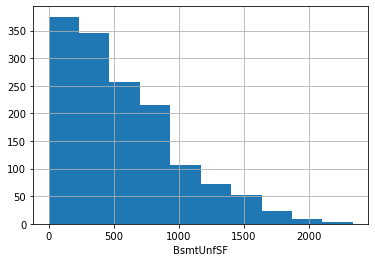

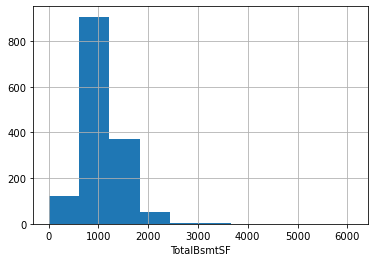

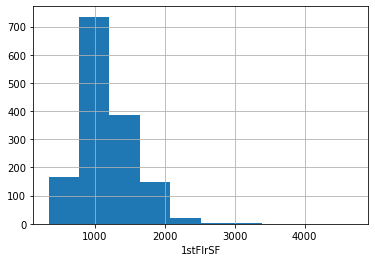

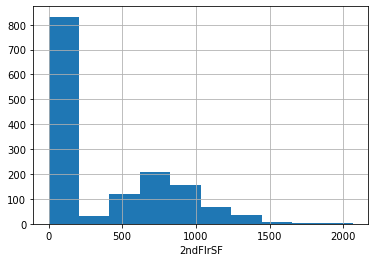

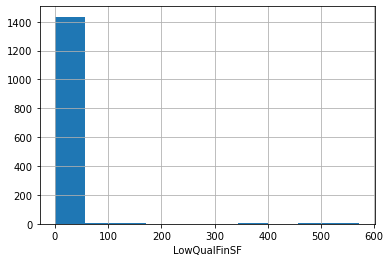

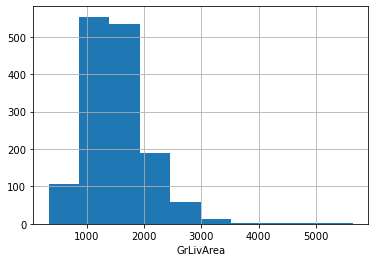

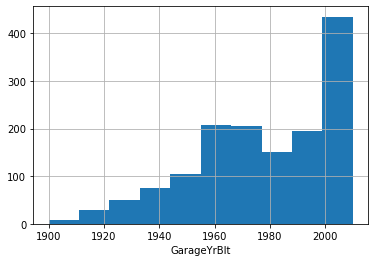

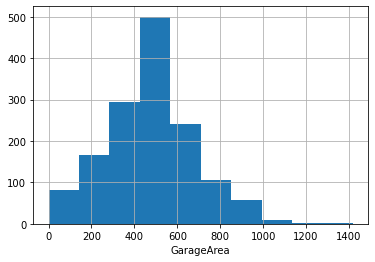

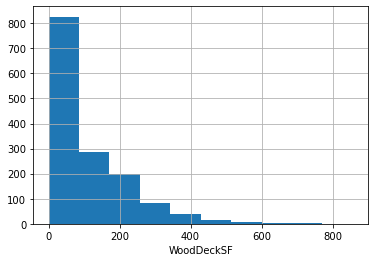

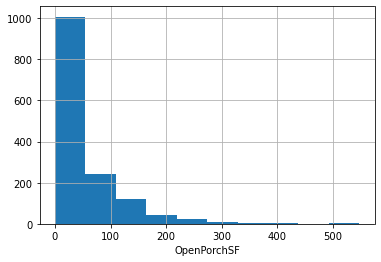

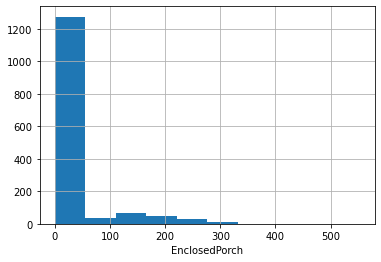

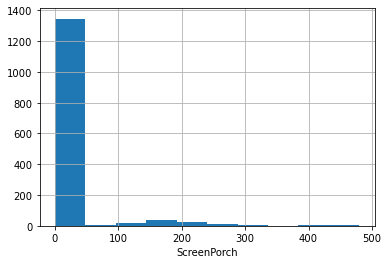

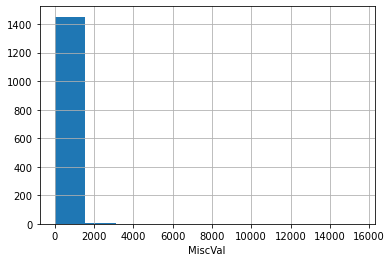

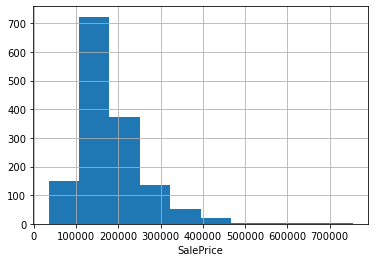

In [75]:
for i in cont:
      train[i].hist()
      plt.xlabel(i)
      plt.show()

Now we will transform skewed data into Normal Distribution(using log (remember pick that feature which didn't contain zero))

In [76]:
sss=['LotFrontage','LotArea','1stFlrSF','GrLivArea']
for f in sss:
    train[f]=np.log(train[f])

In [77]:
disc

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

In [78]:
cont

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

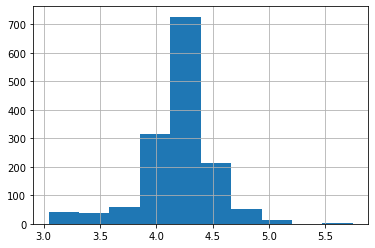

In [79]:
train['LotFrontage'].hist()

Now we will repeat that for test dataset

In [80]:
num=[]
cat=[]
sep(test)
cont=[]
disc=[]
numsep()

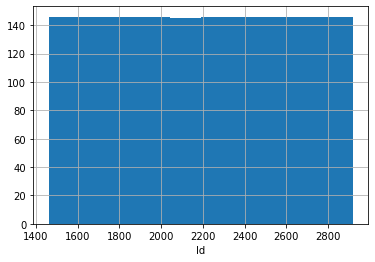

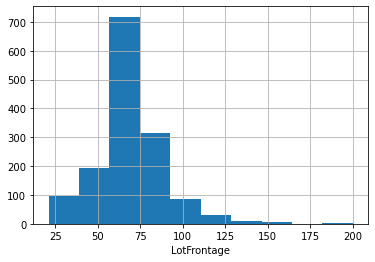

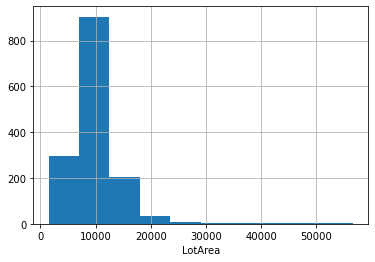

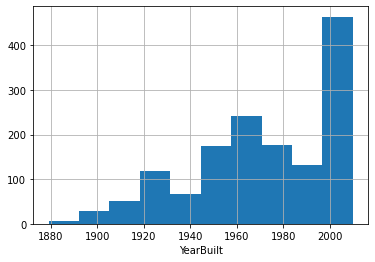

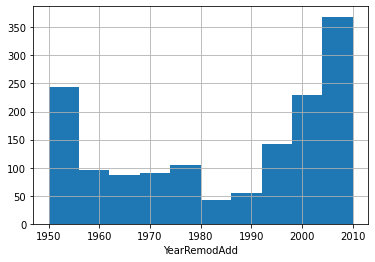

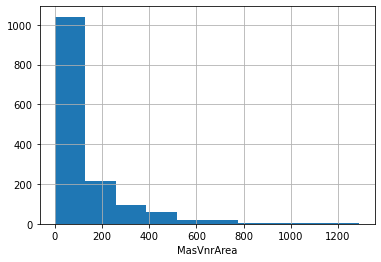

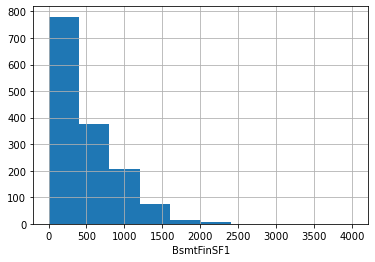

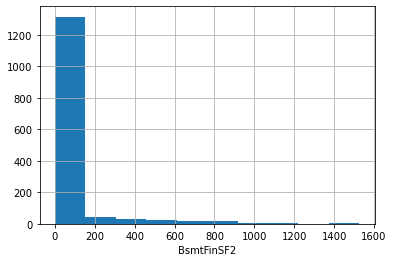

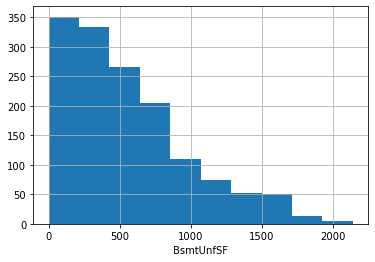

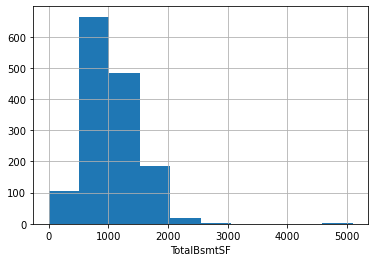

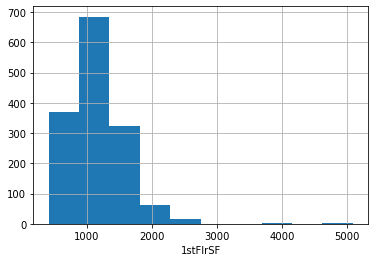

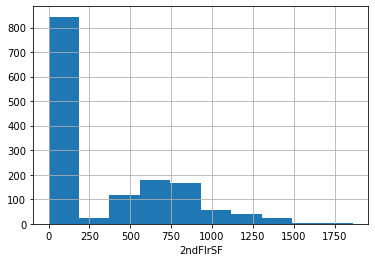

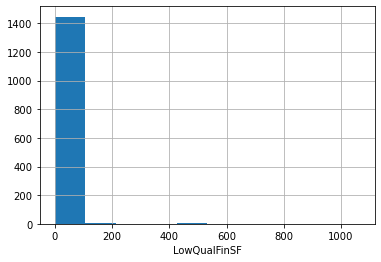

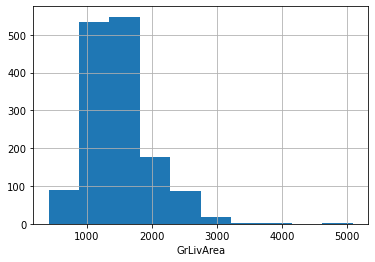

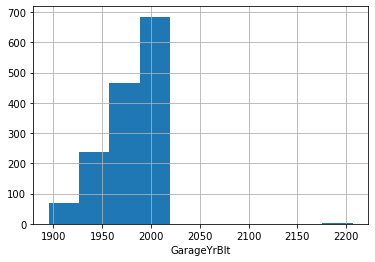

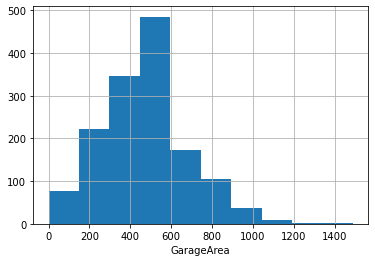

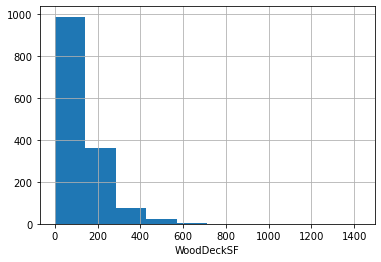

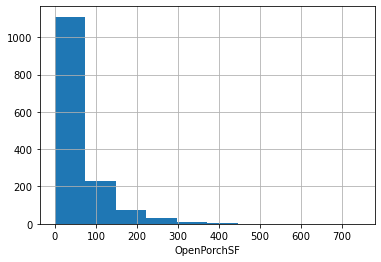

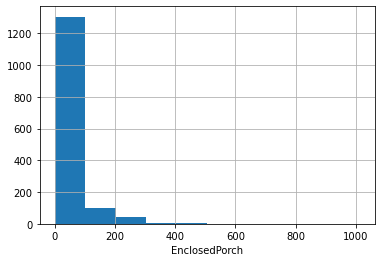

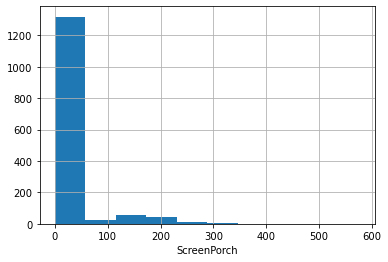

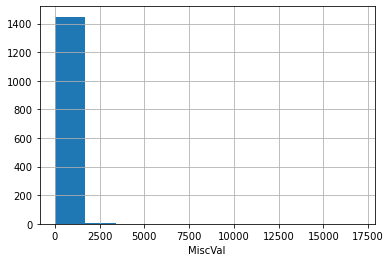

In [81]:
for i in cont:
    test[i].hist()
    plt.xlabel(i)
    plt.show()

In [82]:

ss=['LotFrontage','LotArea','1stFlrSF','GrLivArea']
for q in ss:
    test[q]=np.log(test[q])

# Feature Selection/Data Preprocessing

In [83]:
pp=[]
corr=train.corr()
t=corr["SalePrice"].sort_values(ascending=False)
t=t.to_dict()
for i,j in t.items():
    if j>0.5 or (0.2>j and j>-0.2):
        print(i,j)
        print("*"*40)
        if 0.2>j and j>-0.2:
            pp.append(i)


SalePrice 1.0
****************************************
OverallQual 0.7909816005838047
****************************************
GrLivArea 0.6951180682463286
****************************************
GarageCars 0.640409197258349
****************************************
GarageArea 0.6234314389183598
****************************************
TotalBsmtSF 0.6135805515591944
****************************************
1stFlrSF 0.5912644120820414
****************************************
FullBath 0.5606637627484452
****************************************
TotRmsAbvGrd 0.5337231555820238
****************************************
YearBuilt 0.5228973328794967
****************************************
YearRemodAdd 0.5071009671113867
****************************************
GarageYrBlt 0.5018468404018182
****************************************
BedroomAbvGr 0.1682131543007415
****************************************
ScreenPorch 0.11144657114291048
****************************************
PoolArea 0.0924035

In [84]:
pp

['BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

In [85]:
num=[]
sep(train)

In [86]:
for i in num:
    for j in num:
        train["new"]=train[j]/train[i]
        corr=train.corr()
        t=corr["new"].sort_values(ascending=False)
        t=t.to_dict()
        for r,s in t.items():
            if (s>0.6 or s<-0.6) and r=='SalePrice':
                print(i,j)
                print(s)
                print("*"*40)

                
       

        


LotFrontage OverallQual
0.6587635135699723
****************************************
LotFrontage SalePrice
0.9824136331101884
****************************************
LotArea OverallQual
0.6919101900164021
****************************************
LotArea SalePrice
0.9914724566809693
****************************************
OverallQual SalePrice
0.8415370160473352
****************************************
OverallCond OverallQual
0.6260633254472999
****************************************
OverallCond SalePrice
0.9190060207144689
****************************************
YearBuilt OverallQual
0.7824552948812293
****************************************
YearBuilt TotalBsmtSF
0.6023096967395778
****************************************
YearBuilt GarageCars
0.6296731420901708
****************************************
YearBuilt GarageArea
0.6119849298873006
****************************************
YearBuilt SalePrice
0.9995387122941926
****************************************
YearRemodAdd OverallQu

In [87]:
train.drop(['new'],axis=1,inplace=True)

In [88]:
def add(w):
    w["LotFrontage OverallQual"]=w["OverallQual"]/w["LotFrontage"]
    w["LotArea OverallQual"]=w["OverallQual"]/w["LotArea"]
    w["OverallCond OverallQual"]=w["OverallQual"]/w["OverallCond"]
    w["YearBuilt OverallQual"]=w["OverallQual"]/w["YearBuilt"]
    w["YearBuilt TotalBsmtSF"]=w["TotalBsmtSF"]/w["YearBuilt"]
    w["YearBuilt GarageCars"]=w["GarageCars"]/w["YearBuilt"]
    w["YearBuilt GarageArea"]=w["GarageArea"]/w["YearBuilt"]
    w["YearRemodAdd OverallQual"]=w["OverallQual"]/w["YearRemodAdd"]
    w["YearRemodAdd TotalBsmtSF"]=w["TotalBsmtSF"]/w["YearRemodAdd"]
    w["YearRemodAdd GrLivArea"]=w["GrLivArea"]/w["YearRemodAdd"]
    w["YearRemodAdd GarageCars"]=w["GarageCars"]/w["YearRemodAdd"]
    w["YearRemodAdd GarageArea"]=w["GarageArea"]/w["YearRemodAdd"]
    w["1stFlrSF OverallQual"]=w["OverallQual"]/w["1stFlrSF"]
    w["1stFlrSF TotalBsmtSF"]=w["TotalBsmtSF"]/w["1stFlrSF"]
    w["LowQualFinSF ScreenPorch"]=w["ScreenPorch"]/w["LowQualFinSF"]
    w["GrLivArea OverallQual"]=w["OverallQual"]/w["GrLivArea"]
    w["GrLivArea YrSold"]=w["YrSold"]/w["GrLivArea"]
  
  
    w["GarageYrBlt OverallQual"]=w["OverallQual"]/w["GarageYrBlt"]
    w["GarageYrBlt TotalBsmtSF"]=w["TotalBsmtSF"]/w["GarageYrBlt"]
    w["GarageYrBlt GarageCars"]=w["GarageCars"]/w["GarageYrBlt"]
    w["GarageYrBlt GarageArea"]=w["GarageArea"]/w["GarageYrBlt"]
  
    w["YrSold OverallQual"]=w["OverallQual"]/w["YrSold"]
    w["YrSold TotalBsmtSF"]=w["TotalBsmtSF"]/w["YrSold"]
    w["YrSold GrLivArea"]=w["GrLivArea"]/w["YrSold"]
    w["YrSold GarageArea"]=w["GarageArea"]/w["YrSold"]
    w["GarageYrBlt TotalBsmtSF"]=w["TotalBsmtSF"]/w["GarageYrBlt"]
    w["GarageYrBlt GarageCars"]=w["GarageCars"]/w["GarageYrBlt"] 
    

In [89]:
add(train)

In [90]:
train.drop(pp,axis=1,inplace=True)

In [91]:
add(test)

In [92]:
len(test.columns)

101

In [93]:
test.drop(pp,axis=1,inplace=True)

In [94]:
len(test.columns)

86

In [95]:
len(train.columns)

87

In [96]:
label=train["SalePrice"].values
label

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [97]:
train.drop(["SalePrice"],axis=1,inplace=True)

In [98]:
trtr=["LowQualFinSF ScreenPorch"]
train.drop(trtr,axis=1,inplace=True)

In [99]:
num=[]
cat=[]
sep(train)

In [100]:
def split(a):
    num=a.select_dtypes(include=[np.number]) 
    cat=a.select_dtypes(exclude=[np.number])
    cat=pd.get_dummies(cat)
    return num,cat

In [101]:
x,y=split(train)

In [102]:
scaler=StandardScaler()
def scaling(x,y):
     features_scaled=scaler.fit_transform(x.values)
     q=y.values
     vk=np.concatenate((q,features_scaled),axis=1)
     return vk

In [103]:
features=scaling(x,y)

In [104]:
np.random.seed(1234)
(x_train,x_test,y_train,y_test) = train_test_split(features,label, train_size=0.75, random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [106]:
scores = cross_val_score(lin_reg, x_test,y_test,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean()

46428.51929774599

In [107]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [108]:
y_pred = tree_reg.predict(x_test)
lin_mse = mean_squared_error(y_test,y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

37458.72450256287

In [109]:
scores = cross_val_score(tree_reg, x_test,y_test,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [110]:
tree_rmse_scores.mean()

49778.55743562282

In [111]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [112]:
y_pred = forest_reg.predict(x_test)
lin_mse = mean_squared_error(y_test,y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

28586.047186609867

In [113]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(x_train, y_train)
y_pred = svm_reg.predict(x_test)
svm_mse = mean_squared_error(y_test,y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

70531.5333360733

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [115]:
yt=grid_search.best_estimator_

In [116]:
yt

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [117]:
y_pred = yt.predict(x_test)
lin_mse = mean_squared_error(y_test,y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

30267.112828856465

In [118]:
k=[1,2,3,4,5,100]
for i in k:
    svm=SVR(kernel="linear",epsilon=i)
    svm.fit(x_train,y_train)
    y_pred = svm_reg.predict(x_test)
    svm_mse = mean_squared_error(y_test,y_pred)
    svm_rmse = np.sqrt(svm_mse)
    print(svm_rmse,i)
    print("*"*40)

70531.5333360733 1
****************************************
70531.5333360733 2
****************************************
70531.5333360733 3
****************************************
70531.5333360733 4
****************************************
70531.5333360733 5
****************************************
70531.5333360733 100
****************************************


In [119]:

deg=[2,3,4,5,6]
c=[1,3,10,15,20,100]

for j in deg:
    for ci in c:
            svm=SVR(kernel="rbf",degree=j,C=ci,gamma="scale")
            svm.fit(x_train,y_train)
            scores = cross_val_score(svm, x_test,y_test,
                         scoring="neg_mean_squared_error", cv=10)
            rmse_scores = np.sqrt(-scores)
            print(rmse_scores.mean(),j,ci)

83802.67941738803 2 1
83753.61110447123 2 3
83584.4792818213 2 10
83462.2299964407 2 15
83343.60426316432 2 20
81699.26951372721 2 100
83802.67941738803 3 1
83753.61110447123 3 3
83584.4792818213 3 10
83462.2299964407 3 15
83343.60426316432 3 20
81699.26951372721 3 100
83802.67941738803 4 1
83753.61110447123 4 3
83584.4792818213 4 10
83462.2299964407 4 15
83343.60426316432 4 20
81699.26951372721 4 100
83802.67941738803 5 1
83753.61110447123 5 3
83584.4792818213 5 10
83462.2299964407 5 15
83343.60426316432 5 20
81699.26951372721 5 100
83802.67941738803 6 1
83753.61110447123 6 3
83584.4792818213 6 10
83462.2299964407 6 15
83343.60426316432 6 20
81699.26951372721 6 100


In [120]:
deg=[2,3,4,5,6]
c=[1,3,10,15,20,100]
epsilon=[1.5,2,3]
for j in deg:
    for ci in c:
        for e in epsilon:
                svm=SVR(kernel="rbf",degree=j,C=ci,epsilon=e,gamma="scale")
                svm.fit(x_train,y_train)
                scores = cross_val_score(svm, x_test,y_test,
                             scoring="neg_mean_squared_error", cv=10)
                rmse_scores = np.sqrt(-scores)
                print(rmse_scores.mean(),j,ci,e)

83802.68444562046 2 1 1.5
83802.68856292093 2 1 2
83802.69679858569 2 1 3
83753.61110447123 2 3 1.5
83753.6111024993 2 3 2
83753.63237125725 2 3 3
83584.4792818213 2 10 1.5
83584.4792818213 2 10 2
83584.4792818213 2 10 3
83462.2299964407 2 15 1.5
83462.2299964407 2 15 2
83462.2299964407 2 15 3
83343.62447218664 2 20 1.5
83343.63169180043 2 20 2
83343.64613435292 2 20 3
81699.26951372721 2 100 1.5
81699.26951372721 2 100 2
81699.26951372721 2 100 3
83802.68444562046 3 1 1.5
83802.68856292093 3 1 2
83802.69679858569 3 1 3
83753.61110447123 3 3 1.5
83753.6111024993 3 3 2
83753.63237125725 3 3 3
83584.4792818213 3 10 1.5
83584.4792818213 3 10 2
83584.4792818213 3 10 3
83462.2299964407 3 15 1.5
83462.2299964407 3 15 2
83462.2299964407 3 15 3
83343.62447218664 3 20 1.5
83343.63169180043 3 20 2
83343.64613435292 3 20 3
81699.26951372721 3 100 1.5
81699.26951372721 3 100 2
81699.26951372721 3 100 3
83802.68444562046 4 1 1.5
83802.68856292093 4 1 2
83802.69679858569 4 1 3
83753.61110447123 4 3 

In [121]:
deg=[2,3,4,5,6]
c=[1,3,10,15,20,100]
for j in deg:
    for ci in c:
                svm=SVR(kernel="rbf",degree=j,C=ci,epsilon=0.1,gamma="scale")
                svm.fit(x_train,y_train)
                scores = cross_val_score(svm, x_test,y_test,
                             scoring="neg_mean_squared_error", cv=10)
                rmse_scores = np.sqrt(-scores)
                print(rmse_scores.mean(),j,ci)

83802.67941738803 2 1
83753.61110447123 2 3
83584.4792818213 2 10
83462.2299964407 2 15
83343.60426316432 2 20
81699.26951372721 2 100
83802.67941738803 3 1
83753.61110447123 3 3
83584.4792818213 3 10
83462.2299964407 3 15
83343.60426316432 3 20
81699.26951372721 3 100
83802.67941738803 4 1
83753.61110447123 4 3
83584.4792818213 4 10
83462.2299964407 4 15
83343.60426316432 4 20
81699.26951372721 4 100
83802.67941738803 5 1
83753.61110447123 5 3
83584.4792818213 5 10
83462.2299964407 5 15
83343.60426316432 5 20
81699.26951372721 5 100
83802.67941738803 6 1
83753.61110447123 6 3
83584.4792818213 6 10
83462.2299964407 6 15
83343.60426316432 6 20
81699.26951372721 6 100


In [122]:
deg=[2,3,4,5,6]
c=[1,3,10,15,20,100]
gamma=[0.01, 0.03, 0.1]
for j in deg:
    for ci in c:
        for k in gamma:
                svm=SVR(kernel="rbf",degree=j,C=ci,gamma=k)
                svm.fit(x_train,y_train)
                scores = cross_val_score(svm, x_test,y_test,
                             scoring="neg_mean_squared_error", cv=10)
                rmse_scores = np.sqrt(-scores)
                print(rmse_scores.mean(),j,ci,k)

83801.00068041091 2 1 0.01
83816.00139303147 2 1 0.03
83826.53683241292 2 1 0.1
83748.57462115299 2 3 0.01
83793.56374483393 2 3 0.03
83825.1553712037 2 3 0.1
83567.82432341078 2 10 0.01
83715.89342294652 2 10 0.03
83820.32130488683 2 10 0.1
83437.23466508623 2 15 0.01
83660.7359175969 2 15 0.03
83816.86965484719 2 15 0.1
83310.43401669401 2 20 0.01
83605.3479252276 2 20 0.03
83813.41934695932 2 20 0.1
81532.32938910674 2 100 0.01
82874.53700855792 2 100 0.03
83759.01005916372 2 100 0.1
83801.00068041091 3 1 0.01
83816.00139303147 3 1 0.03
83826.53683241292 3 1 0.1
83748.57462115299 3 3 0.01
83793.56374483393 3 3 0.03
83825.1553712037 3 3 0.1
83567.82432341078 3 10 0.01
83715.89342294652 3 10 0.03
83820.32130488683 3 10 0.1
83437.23466508623 3 15 0.01
83660.7359175969 3 15 0.03
83816.86965484719 3 15 0.1
83310.43401669401 3 20 0.01
83605.3479252276 3 20 0.03
83813.41934695932 3 20 0.1
81532.32938910674 3 100 0.01
82874.53700855792 3 100 0.03
83759.01005916372 3 100 0.1
83801.0006804109

In [123]:
deg=[2,3,4,5,6]
c=[1,3,10,15,20,100]
gamma=[0.01, 0.03, 0.1]
for j in deg:
    for ci in c:
        for k in gamma:
                svm=SVR(kernel="linear",degree=j,C=ci,gamma=k)
                svm.fit(x_train,y_train)
                scores = cross_val_score(svm, x_test,y_test,
                             scoring="neg_mean_squared_error", cv=10)
                rmse_scores = np.sqrt(-scores)
                print(rmse_scores.mean(),j,ci,k)

78620.04693538604 2 1 0.01
78620.04693538604 2 1 0.03
78620.04693538604 2 1 0.1
68796.43304462498 2 3 0.01
68796.43304462498 2 3 0.03
68796.43304462498 2 3 0.1
50980.842533275805 2 10 0.01
50980.842533275805 2 10 0.03
50980.842533275805 2 10 0.1
46510.3511910702 2 15 0.01
46510.3511910702 2 15 0.03
46510.3511910702 2 15 0.1
43787.82023625421 2 20 0.01
43787.82023625421 2 20 0.03
43787.82023625421 2 20 0.1
35676.33292708567 2 100 0.01
35676.33292708567 2 100 0.03
35676.33292708567 2 100 0.1
78620.04693538604 3 1 0.01
78620.04693538604 3 1 0.03
78620.04693538604 3 1 0.1
68796.43304462498 3 3 0.01
68796.43304462498 3 3 0.03
68796.43304462498 3 3 0.1
50980.842533275805 3 10 0.01
50980.842533275805 3 10 0.03
50980.842533275805 3 10 0.1
46510.3511910702 3 15 0.01
46510.3511910702 3 15 0.03
46510.3511910702 3 15 0.1
43787.82023625421 3 20 0.01
43787.82023625421 3 20 0.03
43787.82023625421 3 20 0.1
35676.33292708567 3 100 0.01
35676.33292708567 3 100 0.03
35676.33292708567 3 100 0.1
78620.0469

SVM Linear CLASSIFIER IS PERFORMING A LOT BETTER THAN RBF

In [124]:
svm=SVR(kernel="linear",C=100)
svm.fit(x_train,y_train)
scores = cross_val_score(svm, x_test,y_test,
                             scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean(),j,ci,k)

35676.33292708567 6 100 0.1


lets try some more values of c

In [125]:
c=[100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,5500,5550]
for i in c:
    svm=SVR(kernel="linear",C=i)
    svm.fit(x_train,y_train)
    scores = cross_val_score(svm, x_test,y_test,
                                 scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print(rmse_scores.mean(),i)

35676.33292708567 100
33156.55484660443 200
31402.991970215342 300
30395.961905167547 400
29891.612070499443 500
29504.122519029945 600
29256.392153892288 700
29020.835558025145 800
28800.49842755637 900
28581.59075925399 1000
27496.03777179913 2000
27304.133197084484 3000
27122.2336433862 4000
26964.37244710946 5000
26947.25572132141 5500
26949.97743924155 5550


with increasing c accuracy getting better(C=5500 is best value further increase in c will result in decrease in accuracy)

In [126]:
tree_reg = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(x_train,y_train)
scores = cross_val_score(tree_reg, x_test,y_test,
                                 scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

57914.877959185615


In [127]:
m=[1,2,3,4,5,6,7,8,9,100,150,200,250,300]

for i in m:
    tree_reg = DecisionTreeRegressor(max_depth=i,random_state=42)
    tree_reg.fit(x_train,y_train)
    scores = cross_val_score(tree_reg, x_test,y_test,
                                 scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print(rmse_scores.mean(),i)

63869.53166181375 1
57914.877959185615 2
53671.02873257363 3
50600.758364072746 4
52507.173062752365 5
48050.85331525168 6
50943.96457250185 7
50540.42112686696 8
48843.27674263755 9
49778.55743562282 100
49778.55743562282 150
49778.55743562282 200
49778.55743562282 250
49778.55743562282 300


In [128]:
m=[1,2,3,4,5,6,7,8,9,100,150,200,250,300]
mi=[2,3,4]
for i in m:
    for j in mi:
        tree_reg = DecisionTreeRegressor(max_depth=i,min_samples_split=j,random_state=42)
        tree_reg.fit(x_train,y_train)
        scores = cross_val_score(tree_reg, x_test,y_test,
                                     scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        print(rmse_scores.mean(),i,j)

63869.53166181375 1 2
63869.53166181375 1 3
63869.53166181375 1 4
57914.877959185615 2 2
57914.877959185615 2 3
57914.877959185615 2 4
53671.02873257363 3 2
54562.82216214986 3 3
54562.82216214986 3 4
50600.758364072746 4 2
51477.628244469684 4 3
51477.628244469684 4 4
52507.173062752365 5 2
49447.119219993045 5 3
48442.942532780035 5 4
48050.85331525168 6 2
48347.75031947505 6 3
48626.61501609203 6 4
50943.96457250185 7 2
51920.04263428082 7 3
53527.83120546542 7 4
50540.42112686696 8 2
50994.250381374615 8 3
47634.46986747986 8 4
48843.27674263755 9 2
54296.63518294457 9 3
54827.10151190524 9 4
49778.55743562282 100 2
50408.47738882517 100 3
51942.514251183005 100 4
49778.55743562282 150 2
50408.47738882517 150 3
51942.514251183005 150 4
49778.55743562282 200 2
50408.47738882517 200 3
51942.514251183005 200 4
49778.55743562282 250 2
50408.47738882517 250 3
51942.514251183005 250 4
49778.55743562282 300 2
50408.47738882517 300 3
51942.514251183005 300 4


In [129]:
mi=[2,3,4]
for j in mi:
    for k in range(2,100):
            tree_reg = DecisionTreeRegressor(min_samples_split=j,max_leaf_nodes=k,random_state=42)
            tree_reg.fit(x_train,y_train)
            scores = cross_val_score(tree_reg, x_test,y_test,
                                         scoring="neg_mean_squared_error", cv=10)
            rmse_scores = np.sqrt(-scores)
            print(rmse_scores.mean(),j,k)

63869.53166181375 2 2
63054.84016557733 2 3
57358.458832998374 2 4
58238.19876472147 2 5
56462.5671670966 2 6
55307.37318519298 2 7
53940.35195872135 2 8
53725.90804116566 2 9
53296.73770262052 2 10
52896.238791591066 2 11
50872.028024627805 2 12
50667.11066582067 2 13
50939.18134031597 2 14
50333.084806956474 2 15
49793.17687401131 2 16
50027.64032170372 2 17
49820.212755686625 2 18
50295.59198021728 2 19
50092.03181309429 2 20
50498.1034098243 2 21
50165.02311794883 2 22
50247.046069986376 2 23
50104.619689868145 2 24
50007.273971102375 2 25
49980.744721854695 2 26
50000.82336513761 2 27
50101.108062102976 2 28
50204.93952253182 2 29
50176.03334813302 2 30
50388.108748567574 2 31
50277.798526928644 2 32
50418.42818346266 2 33
50220.14877798735 2 34
50242.967886405364 2 35
50134.040443865335 2 36
50097.46672463102 2 37
50180.088743674976 2 38
49888.96772349535 2 39
49836.2233539028 2 40
49731.630558786375 2 41
49665.036049753886 2 42
50062.63984262367 2 43
50030.67585729227 2 44
50223

In [130]:
mi=[2,3,4]
max=[1,2,3,4,5,6,7,8,9,10,11,12,13]
for m in max:
    for j in mi:
        for k in range(10,20):
                tree_reg = DecisionTreeRegressor(min_samples_split=j,max_leaf_nodes=k,max_depth=m,random_state=42)
                tree_reg.fit(x_train,y_train)
                scores = cross_val_score(tree_reg, x_test,y_test,
                                             scoring="neg_mean_squared_error", cv=10)
                rmse_scores = np.sqrt(-scores)
                print(rmse_scores.mean(),j,k)

63869.53166181375 2 10
63869.53166181375 2 11
63869.53166181375 2 12
63869.53166181375 2 13
63869.53166181375 2 14
63869.53166181375 2 15
63869.53166181375 2 16
63869.53166181375 2 17
63869.53166181375 2 18
63869.53166181375 2 19
63869.53166181375 3 10
63869.53166181375 3 11
63869.53166181375 3 12
63869.53166181375 3 13
63869.53166181375 3 14
63869.53166181375 3 15
63869.53166181375 3 16
63869.53166181375 3 17
63869.53166181375 3 18
63869.53166181375 3 19
63869.53166181375 4 10
63869.53166181375 4 11
63869.53166181375 4 12
63869.53166181375 4 13
63869.53166181375 4 14
63869.53166181375 4 15
63869.53166181375 4 16
63869.53166181375 4 17
63869.53166181375 4 18
63869.53166181375 4 19
57914.877959185615 2 10
57914.877959185615 2 11
57914.877959185615 2 12
57914.877959185615 2 13
57914.877959185615 2 14
57914.877959185615 2 15
57914.877959185615 2 16
57914.877959185615 2 17
57914.877959185615 2 18
57914.877959185615 2 19
57914.877959185615 3 10
57914.877959185615 3 11
57914.877959185615 3 1

Decision tree is acting like a dumbed

In [131]:
rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1,random_state=42)
rnd_clf.fit(x_train, y_train)


RandomForestRegressor(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [132]:
scores = cross_val_score(rnd_clf, x_test,y_test,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

35869.230288283354


In [133]:
rnd_clf = RandomForestRegressor(n_estimators=500, n_jobs=-1,random_state=42)
rnd_clf.fit(x_train, y_train)
scores = cross_val_score(rnd_clf, x_test,y_test,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

33546.019408615284


In [134]:
n_estimators=[10,20,30,40]
for i in n_estimators:
    rnd_clf = RandomForestRegressor(n_estimators=i,random_state=42)
    rnd_clf.fit(x_train, y_train)
    scores = cross_val_score(rnd_clf, x_test,y_test,scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print(rmse_scores.mean())

34045.922673186345
33872.106776431676
33744.94793898791
33565.505830838214


In [135]:
n_estimators=[50,60,70,80,90,100]
max=[8,9,10,11,12]
for i in n_estimators:
    for j in max:
        rnd_clf = RandomForestRegressor(n_estimators=i,random_state=42,max_features=j)
        rnd_clf.fit(x_train, y_train)
        scores = cross_val_score(rnd_clf, x_test,y_test,scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        print(rmse_scores.mean())

32042.916847772274
32682.386556983914
32030.673260699852
32099.81870446157
32397.641629558173
31994.941808007985
32723.86090087785
32098.968897837487
31780.654667775285
32320.868980593998
31989.77192932544
32307.72421924599
32147.23624939465
31599.010075387865
32201.166574776707
32028.69043273926
32544.915572021844
32380.837592497213
31651.34392669701
31972.092043476023
32135.649457470096
32227.771777051035
32285.52911785402
31730.91879694606
31831.04405744046
32102.27063854451
32038.21254323093
32241.323097058787
31690.90222530521
31769.584697783874


In [136]:
import xgboost

In [137]:
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
scores = cross_val_score(xgb_reg, x_test,y_test,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

37559.39312393231


In [139]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.30],
    "max_depth":[3,4,5,6,7,8,9,10,12,15,20,30,40,50],
    "min_child_weight":[1,3,5,7,9,11,12,13,14,16,19,25,30],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1],
    "colsample_bytree":[0.3,0.4,0.5,0.6,0.7,0.8],
}

In [140]:
rs=RandomizedSearchCV(xgb_reg,param_distributions=params,n_iter=10,scoring='neg_mean_squared_error',cv=5)

In [141]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                          tree_method='exact',
                                          validate_parameters=1,
                   

In [142]:
rs.best_params_

{'min_child_weight': 30,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

In [143]:
rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=30, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [144]:
xgb=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=12,
             min_child_weight=30, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [145]:
scores = cross_val_score(xgb, x_test,y_test,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

32365.659809517627


From all analysis we came to conclusion that our svm model is the best

In [146]:
test.drop(trtr,axis=1,inplace=True)

In [147]:
num=[]
cat=[]
sep(test)
x1,y1=split(test)


In [148]:
num=[]
cat=[]
sep(test)
x,y=split(train)


In [149]:
a=[]
for i in y.columns:
    n=-1
    for j in y1.columns:
        n=n+1
        if i==j:
            break
        elif n==222:
            a.append(i)

In [150]:
for i in a:
    y1[i]=y[i]

In [151]:
len(y1.columns)

239

In [152]:
features1=scaling(x1,y1)

In [153]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=12,
             min_child_weight=30, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [154]:
y_pred=xgb.predict(features1)

In [155]:
fffff.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [156]:
r = pd.Series(y_pred,name="SalePrice")

In [157]:
fffff.tail

<bound method NDFrame.tail of         Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]>

In [158]:
r

0       131275.406250
1       139226.484375
2       184361.828125
3       173928.515625
4       193718.968750
            ...      
1454     92271.187500
1455    101729.359375
1456    175113.812500
1457    117328.453125
1458    214645.531250
Name: SalePrice, Length: 1459, dtype: float32

In [159]:
submission = pd.concat([pd.Series(range(1461,2920),name = "Id"),r],axis = 1)

In [160]:
submission

,Id,SalePrice
0,1461,131275.406250
1,1462,139226.484375
2,1463,184361.828125
3,1464,173928.515625
4,1465,193718.968750
...,...,...
1454,2915,92271.187500
1455,2916,101729.359375
1456,2917,175113.812500
1457,2918,117328.453125


In [161]:
submission.to_csv("regression.csv",index=False)